# Data Analysis.

### Objectives:

1. Gather important data to understand and build model upon **(Data Gathering)**.

2. Split data to train and test data to avoid Data Snooping Bias.

3. Explore raw data **(Data Assessment)** to understand the structure and quality of data.

4. Remove as much quality issues from the data found in Data Assessment **(Data Cleaning)**.

5. Perform **Exploratory Data Analysis** to get following insights:

    a. **Summary Statistics** of data to understand key locations in data set.

    b. Perform **Distribution Analysis** to check the distribution of each data point. Important for outlier detection and removal.
    
    c. **Correlation Analysis** to check correlation between features and outcome and other features. Important to select only useful features to prevent noisy data to go inside model and check for multicoleniarity.

## Dependencies

In [1]:
# Importing dependencies.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# Installing kaggle module to use kaggle API.
%pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Gathering.

Gathering data from **Kaggle.com** via kaggle's official API.
source : https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction

In [2]:
# Using kaggle module commands to call kaggle API, which will install dataset in current directory. (Kaggle key required for it to function)
os.system("kaggle datasets download -d harishkumardatalab/housing-price-prediction -p . --unzip")

0

In [3]:
# Doing Train Test split and storing them in different CSV files.

main_dataset = pd.read_csv('Housing.csv')
train_dataset, test_dataset = train_test_split(main_dataset, test_size=0.2, random_state=42)
train_dataset

# Further Analysis will be performed on train_dataset.

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,7525000,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
93,6300000,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
335,3920000,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
412,3430000,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
471,3010000,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6755000,6000,4,2,4,yes,no,no,no,yes,0,no,unfurnished
106,6160000,5450,4,2,1,yes,no,yes,no,yes,0,yes,semi-furnished
270,4340000,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
435,3290000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished


## Data Assessment

**Objectives:**

1. Understanding the core structure of data.

2. Checking for quality issues and inconsistencies.

3. Improvements and necessery actions to be taken on data.

In [4]:
# Getting most basic information about dataset.

train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436 entries, 46 to 102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             436 non-null    int64 
 1   area              436 non-null    int64 
 2   bedrooms          436 non-null    int64 
 3   bathrooms         436 non-null    int64 
 4   stories           436 non-null    int64 
 5   mainroad          436 non-null    object
 6   guestroom         436 non-null    object
 7   basement          436 non-null    object
 8   hotwaterheating   436 non-null    object
 9   airconditioning   436 non-null    object
 10  parking           436 non-null    int64 
 11  prefarea          436 non-null    object
 12  furnishingstatus  436 non-null    object
dtypes: int64(6), object(7)
memory usage: 47.7+ KB


In [5]:
# Exploring 1st 5 rows of dataset.

train_dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,7525000,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
93,6300000,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
335,3920000,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
412,3430000,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
471,3010000,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished


#### Data Assessing Results:

1. Data is complete, clean and consistent. No need for Data Cleaning.
2. Data Holds some categorical variables. Need to encode them.

## Data Cleaning.

**Procedure:** Code -> Test -> Implement

**Objectives:**

1. Deal with categorical variables.

In [6]:
# Observing a large chunk of data.
train_dataset.head(30)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,7525000,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
93,6300000,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
335,3920000,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
412,3430000,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
471,3010000,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished
237,4620000,5010,3,1,2,yes,no,yes,no,no,0,no,semi-furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
470,3010000,5076,3,1,1,no,no,no,no,no,0,no,unfurnished
511,2520000,3180,3,1,1,no,no,no,no,no,0,no,unfurnished
361,3710000,6020,3,1,1,yes,no,no,no,no,0,no,semi-furnished


In [7]:
# mainroad,	guestroom, basement, hotwaterheating, airconditioning and prefarea are Binary Categoricl Variables and can be fixed using Labeled Encoding.

categorical_variables = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

for i in range (len(categorical_variables)):
    train_dataset[categorical_variables[i]] = train_dataset[categorical_variables[i]].apply(lambda x: 1 if x == 'yes' else 0)

train_dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,7525000,6000,3,2,4,1,0,0,0,1,1,0,furnished
93,6300000,7200,3,2,1,1,0,1,0,1,3,0,semi-furnished
335,3920000,3816,2,1,1,1,0,1,0,1,2,0,furnished
412,3430000,2610,3,1,2,1,0,1,0,0,0,1,unfurnished
471,3010000,3750,3,1,2,1,0,0,0,0,0,0,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6755000,6000,4,2,4,1,0,0,0,1,0,0,unfurnished
106,6160000,5450,4,2,1,1,0,1,0,1,0,1,semi-furnished
270,4340000,4500,3,2,3,1,0,0,1,0,1,0,furnished
435,3290000,4040,2,1,1,1,0,0,0,0,0,0,unfurnished


In [8]:
# furnishingstatus need OneHotEncoding.

encoder = OneHotEncoder()

train_dataset = pd.get_dummies(train_dataset, columns=['furnishingstatus'], drop_first=False, dtype=int)
train_dataset


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,7525000,6000,3,2,4,1,0,0,0,1,1,0,1,0,0
93,6300000,7200,3,2,1,1,0,1,0,1,3,0,0,1,0
335,3920000,3816,2,1,1,1,0,1,0,1,2,0,1,0,0
412,3430000,2610,3,1,2,1,0,1,0,0,0,1,0,0,1
471,3010000,3750,3,1,2,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6755000,6000,4,2,4,1,0,0,0,1,0,0,0,0,1
106,6160000,5450,4,2,1,1,0,1,0,1,0,1,0,1,0
270,4340000,4500,3,2,3,1,0,0,1,0,1,0,1,0,0
435,3290000,4040,2,1,1,1,0,0,0,0,0,0,0,0,1


## Exploratory Data Analysis.

**Objectives**:

a. **Summary Statistics** of data to understand key locations in data set.

b. Perform **Distribution Analysis** to check the distribution of each data point. Important for outlier detection and removal.
    
c. **Correlation Analysis** to check correlation between features and outcome and other features. Important to select only useful features to prevent noisy data to go inside model and check for multicoleniarity.

In [9]:
# Summary Statistics
train_dataset.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,4.360000e+02,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,4.706527e+06,5154.144495,2.958716,1.266055,1.782110,0.857798,0.178899,0.357798,0.050459,0.307339,0.685780,0.233945,0.254587,0.431193,0.314220
std,1.757976e+06,2204.313664,0.747804,0.477391,0.858093,0.349658,0.383708,0.479903,0.219141,0.461921,0.854941,0.423824,0.436129,0.495812,0.464738
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.498250e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.291000e+06,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.600000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.225000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


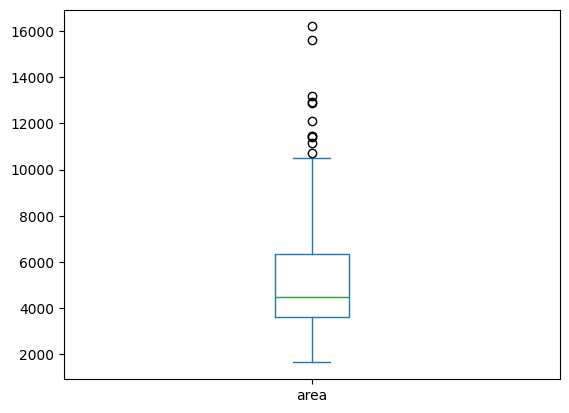

In [10]:
# Important to remove Outliers from area variable to enhance model's performance. Making Box plot to see outliers presence.

train_dataset['area'].plot.box()
plt.show()

In [11]:
# Finding minimum value, after that all values can be considered outliers
IQR = train_dataset['area'].quantile(0.75) - train_dataset['area'].quantile(0.25)
third_quantile = train_dataset['area'].quantile(0.75)

Thershold_value = (1.5 * IQR) + third_quantile

Thershold_value

10500.0

As we are working on normal data, removing outliers will be a good Idea.

In [12]:
#Checking correlations between variables.

train_dataset.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.533820,0.371415,0.532511,0.405019,0.303753,0.264367,0.206661,0.075273,0.470574,0.378698,0.299966,0.240734,0.043157,-0.271958
area,0.533820,1.000000,0.154674,0.199208,0.070472,0.291014,0.175797,0.040558,-0.004422,0.215263,0.337417,0.207853,0.115681,0.005502,-0.114430
bedrooms,0.371415,0.154674,1.000000,0.391447,0.405104,0.003872,0.081881,0.092501,0.026769,0.203194,0.141470,0.074064,0.074593,0.035722,-0.108112
bathrooms,0.532511,0.199208,0.391447,1.000000,0.315805,0.048138,0.090957,0.085245,0.047174,0.212131,0.194037,0.009798,0.093497,0.038671,-0.128998
stories,0.405019,0.070472,0.405104,0.315805,1.000000,0.118688,0.048842,-0.184271,0.021927,0.325929,0.050604,-0.004900,0.136281,-0.021812,-0.104622
mainroad,0.303753,0.291014,0.003872,0.048138,0.118688,1.000000,0.104378,0.057313,-0.026148,0.128881,0.196238,0.225002,0.147498,-0.003528,-0.134654
guestroom,0.264367,0.175797,0.081881,0.090957,0.048842,0.104378,1.000000,0.400636,-0.025583,0.155998,0.031599,0.180266,0.084376,0.028601,-0.109696
basement,0.206661,0.040558,0.092501,0.085245,-0.184271,0.057313,0.400636,1.000000,0.002808,0.093903,0.044927,0.220449,0.090992,0.055398,-0.144493
hotwaterheating,0.075273,-0.004422,0.026769,0.047174,0.021927,-0.026148,-0.025583,0.002808,1.000000,-0.130844,0.060281,-0.053136,0.009599,0.032028,-0.043178
airconditioning,0.470574,0.215263,0.203194,0.212131,0.325929,0.128881,0.155998,0.093903,-0.130844,1.000000,0.192711,0.089846,0.169858,-0.047977,-0.108216


furnishingstatus_semi-furnished and	furnishingstatus_unfurnished have -0.58 correlation.

[]

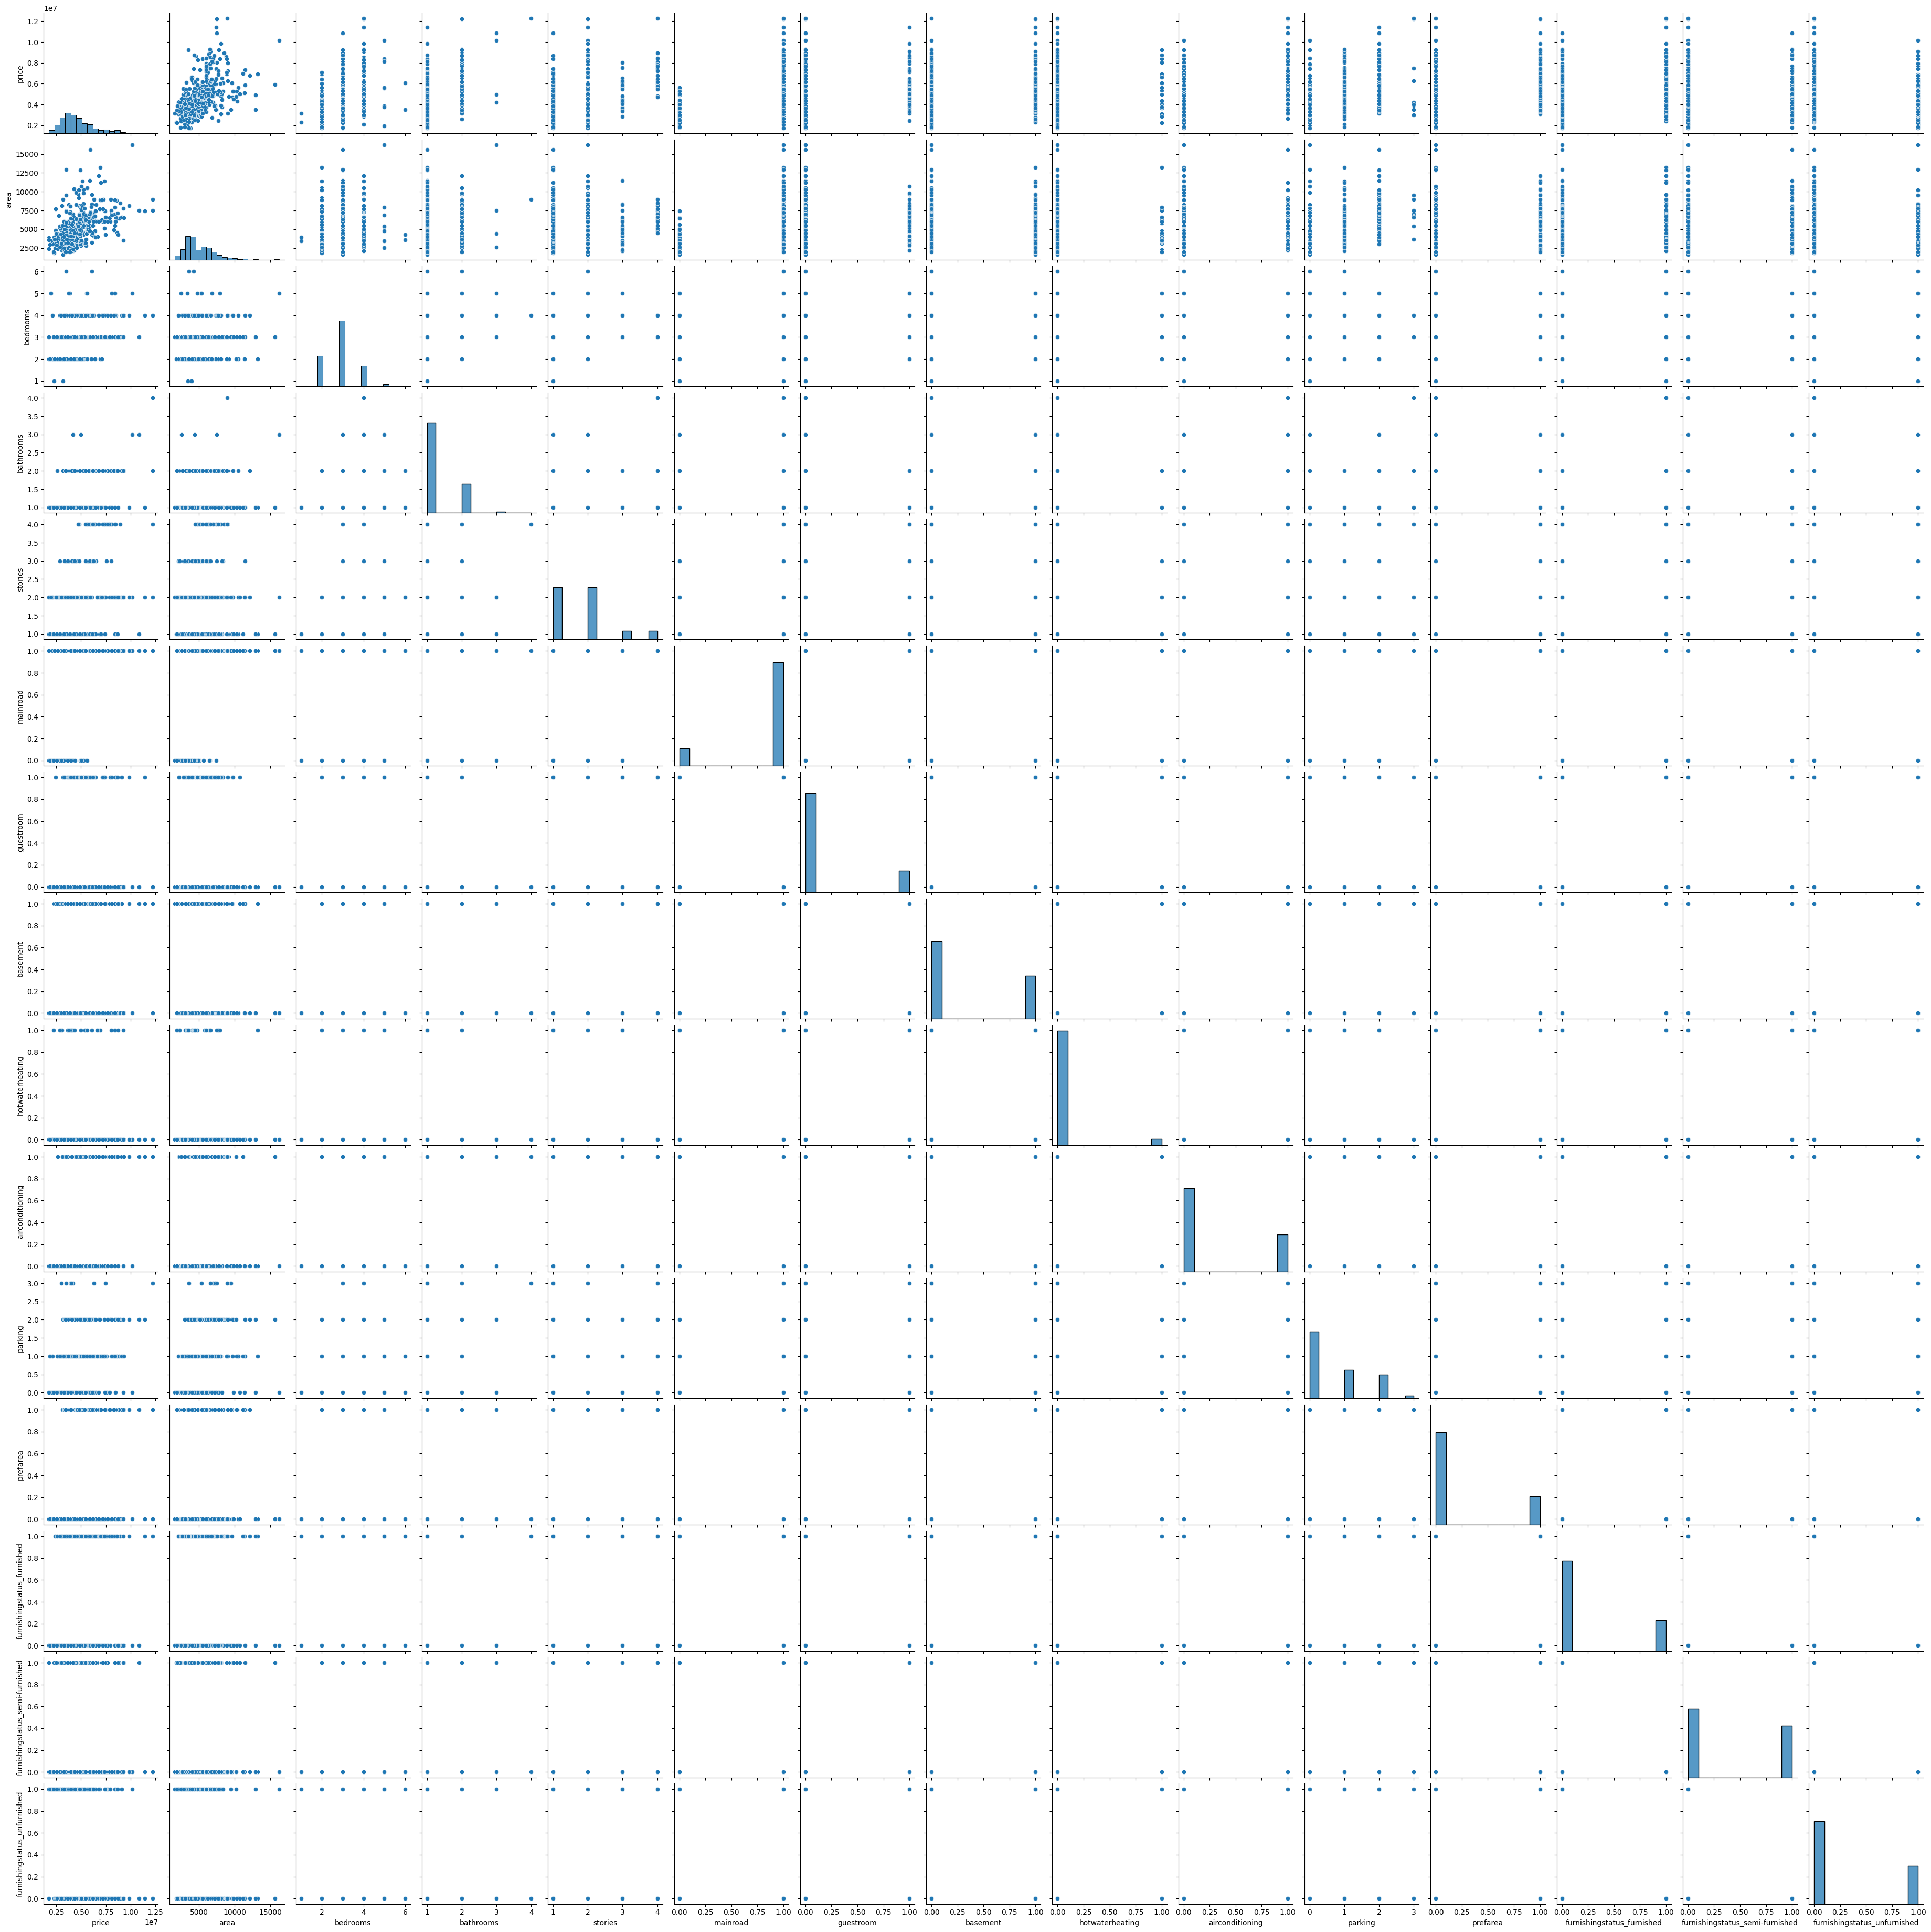

In [13]:
# Visualising correlations.

sns.pairplot(train_dataset)
plt.plot()

**EDA Key Findings**

1. In area feature, values after 10500 can be considered as outliers.

2. furnishingstatus_semi-furnished and	furnishingstatus_unfurnished have -0.58 correlation. **Potential Multicolleniarity**



## Conclusion and Key Findings.

1. **Data Gathering**: Done using kaggle API. API reference guide -> https://www.kaggle.com/docs/api

2. **Data Assessment**: Key findings were, 

a. Dataset was fully cleaned, complete and consistent. No data cleaning required.

b. Perhaps categorical features needed to be converted in numbers for EDA plotting and eventually regression model building.

3. **Data Cleaning**: Converted categorical features to appropriate format for Analysing and Modelling phase.

4. **Exploratory Data Analysis**: Tests done and findings are:

a. Summary statistics: Using df.describe(), gathered all central tendencies and measure of despersions of each feature. Will be usefull for modelling phase.

b. Box plot: Constructed Box plot of 'area' feature to check the overall distribution of feature and presence of outliers. found presence of potential outliers after area '10500'. 

c. Correlation Analysis: Used df.corr() and plotting scatter matrix of all features. Found furnishingstatus_semi-furnished and furnishingstatus_unfurnished have -0.58 correlation. Suggestion is to check VIF of features to look for potential multicolleniarity in features.

## Converting Splits for into CSVs to do modelling on other notebook.

In [16]:
train_dataset.to_csv('train_dataset', index=False)
test_dataset.to_csv('test_dataset', index=False)